# Datetime Index

## Python Datetime Review

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

In [2]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

### Pasar a formato datetime

In [3]:
my_date = datetime(my_year,my_month,my_day)
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [4]:
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

### Obtener el día

In [5]:
my_date_time.day

2

In [6]:
my_date_time.hour

13

## NumPy Datetime Arrays
We mentioned that NumPy handles dates more efficiently than Python's datetime format.<br>
The NumPy data type is called <em>datetime64</em> to distinguish it from Python's datetime.

In this section we'll show how to set up datetime arrays in NumPy. These will become useful later on in the course.<br>
For more info on NumPy visit https://docs.scipy.org/doc/numpy-1.15.4/reference/arrays.datetime.html

In [7]:
# CREATE AN ARRAY FROM THREE DATES
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64')

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [8]:
# CREATE AN ARRAY FROM THREE DATES
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]') #Y

array(['2016', '2017', '2018'], dtype='datetime64[Y]')

In [9]:
# CREATE AN ARRAY FROM THREE DATES
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[h]') #h

array(['2016-03-15T00', '2017-05-24T00', '2018-08-09T00'],
      dtype='datetime64[h]')

## NumPy Date Ranges
Just as <tt>np.arange(start,stop,step)</tt> can be used to produce an array of evenly-spaced integers, we can pass a <tt>dtype</tt> argument to obtain an array of dates. Remember that the stop date is <em>exclusive</em>.

In [10]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [11]:
# AN ARRAY OF DATES FROM 6/1/18 TO 6/22/18 SPACED ONE WEEK APART
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]') #de, hasta, cada cuanto tomas las fechas, dia

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

By omitting the step value we can obtain every value based on the precision.

In [12]:
# AN ARRAY OF DATES FOR EVERY YEAR FROM 1968 TO 1975
np.arange('1968', '1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

## Pandas Datetime Index

We'll usually deal with time series as a datetime index when working with pandas dataframes. Fortunately pandas has a lot of functions and methods to work with time series!<br>
For more on the pandas DatetimeIndex visit https://pandas.pydata.org/pandas-docs/stable/timeseries.html

The simplest way to build a DatetimeIndex is with the <tt><strong>pd.date_range()</strong></tt> method:

In [13]:
# THE WEEK OF JULY 8TH, 2018
idx = pd.date_range('7/8/2018', periods=7, freq='D')
idx

DatetimeIndex(['2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14'],
              dtype='datetime64[ns]', freq='D')

<div class="alert alert-info"><strong>DatetimeIndex Frequencies:</strong> When we used <tt>pd.date_range()</tt> above, we had to pass in a frequency parameter <tt>'D'</tt>. This created a series of 7 dates spaced one day apart. We'll cover this topic in depth in upcoming lectures, but for now, a list of time series offset aliases like <tt>'D'</tt> can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.</div>

Another way is to convert incoming text with the <tt><strong>pd.to_datetime()</strong></tt> method:

In [14]:
#idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])
#idx

A third way is to pass a list or an array of datetime objects into the <tt><strong>pd.DatetimeIndex()</strong></tt> method:

In [15]:
# Create a NumPy datetime array
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [16]:
# Convert to an index
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[s]', freq=None)

Notice that even though the dates came into pandas with a day-level precision, pandas assigns a nanosecond-level precision with the expectation that we might want this later on.

To set an existing column as the index, use <tt>.set_index()</tt><br>
><tt>df.set_index('Date',inplace=True)</tt>

## Pandas Datetime Analysis

In [17]:
# Create some random data
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[-1.19316453  0.63170705]
 [-0.11129999  0.05971971]
 [ 1.12837377 -0.21531797]]


In [18]:
# Create a DataFrame with our random data, our date index, and our columns
df = pd.DataFrame(data,idx,cols)
df

,A,B
2016-03-15,-1.193165,0.631707
2017-05-24,-0.111300,0.059720
2018-08-09,1.128374,-0.215318


In [19]:
df.index

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[s]', freq=None)

### Latest Date Value

In [20]:
df.index.max()

Timestamp('2018-08-09 00:00:00')

### Earliest Date Value

In [21]:
df.index.min()

Timestamp('2016-03-15 00:00:00')

### Latest Date Index Location

In [22]:
df.index.argmax()

np.int64(2)

### Earliest Date Index Location

In [23]:
df.index.argmin()

np.int64(0)

<div class="alert alert-info"><strong>NOTE:</strong> Normally we would find index locations by running <tt>.idxmin()</tt> or <tt>.idxmax()</tt> on <tt>df['column']</tt> since <tt>.argmin()</tt> and <tt>.argmax()</tt> have been deprecated. However, we still use <tt>.argmin()</tt> and <tt>.argmax()</tt> on the index itself.</div>

## Time Resampling

In [24]:
pwd

'/workspaces/curso-udemy-python-for-time-series-data-analysis'

In [25]:
df = pd.read_csv('starbucks.csv', index_col='Date') 
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [26]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [27]:
## Arriba vemos que el índice es de tipo object, como string

In [28]:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True) 
# parse_dates=True: Le indica a pandas que intente convertir automáticamente la(s) columna(s) de fecha (en este caso, el índice porque usamos index_col) a un objeto de tipo fecha/hora (datetime) en vez de dejarlos como simples strings (cadenas de texto).
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [29]:
df.index # Ahora vemos que el formato del indice es de datetime64

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

## resample()

A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

In [30]:
# Our index
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [31]:
# A=year end frequency ; daily --> yearly
df.resample(rule='A')

/tmp/ipykernel_2397/395821027.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A')


In [32]:
# Cómo vamos a agregar estos datos diarios en datos anuales? La suma de todo por año? La media de todo por año?
df.resample(rule='A').mean()

# Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean),
# and reports the result as the last day of that year.

/tmp/ipykernel_2397/1383459934.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A').mean()


,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


### Custom Resampling Functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [33]:
def first_day(entry):
    if len(entry) !=0:
        return entry[0]

In [34]:
# Otra forma
def first_day(entry):
    # Is there an entry?
    if len(entry):
        # If so, return first entry
        return entry[0]

In [35]:
df.resample(rule='A').apply(first_day)
# Informa el primer precio de cierre y volumen de los primeros días de cada año

/tmp/ipykernel_2397/4235251717.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A').apply(first_day)
/tmp/ipykernel_2397/1248078429.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [36]:
df.head()
# El primer día de 2015 teníamos un precio de cierre de 38 y un volumen de 6.9M, que es lo que se registra para 2015 arriba

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [37]:
# Tenga en cuenta ahora que el tipo de índice realmente no tiene sentido con este nivel de información para el mes y el año
#  y puede ser un poco engañoso, por lo que debe tener cuidado al usar sus propias funciones de muestreo.

### Plotting

In [38]:
df['Close'].resample('A').mean() 
# Precio promedio por año de la columna Close

/tmp/ipykernel_2397/4090808837.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df['Close'].resample('A').mean()


Date
2015-12-31    50.078100
2016-12-31    53.891732
2017-12-31    55.457310
2018-12-31    56.870005
Freq: YE-DEC, Name: Close, dtype: float64

/tmp/ipykernel_2397/3093887902.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df['Close'].resample('A').mean() .plot.bar(title='Yearly Mean Closing Price for Starbucks')


<Axes: title={'center': 'Yearly Mean Closing Price for Starbucks'}, xlabel='Date'>

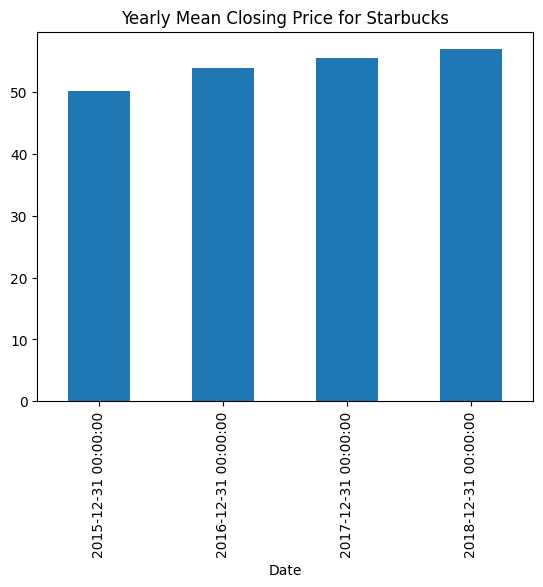

In [39]:
df['Close'].resample('A').mean() .plot.bar(title='Yearly Mean Closing Price for Starbucks')

/tmp/ipykernel_2397/617471873.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Close'].resample('M').max() .plot.bar(figsize=(16,6),title='Yearly Mean Closing Price for Starbucks')


<Axes: title={'center': 'Yearly Mean Closing Price for Starbucks'}, xlabel='Date'>

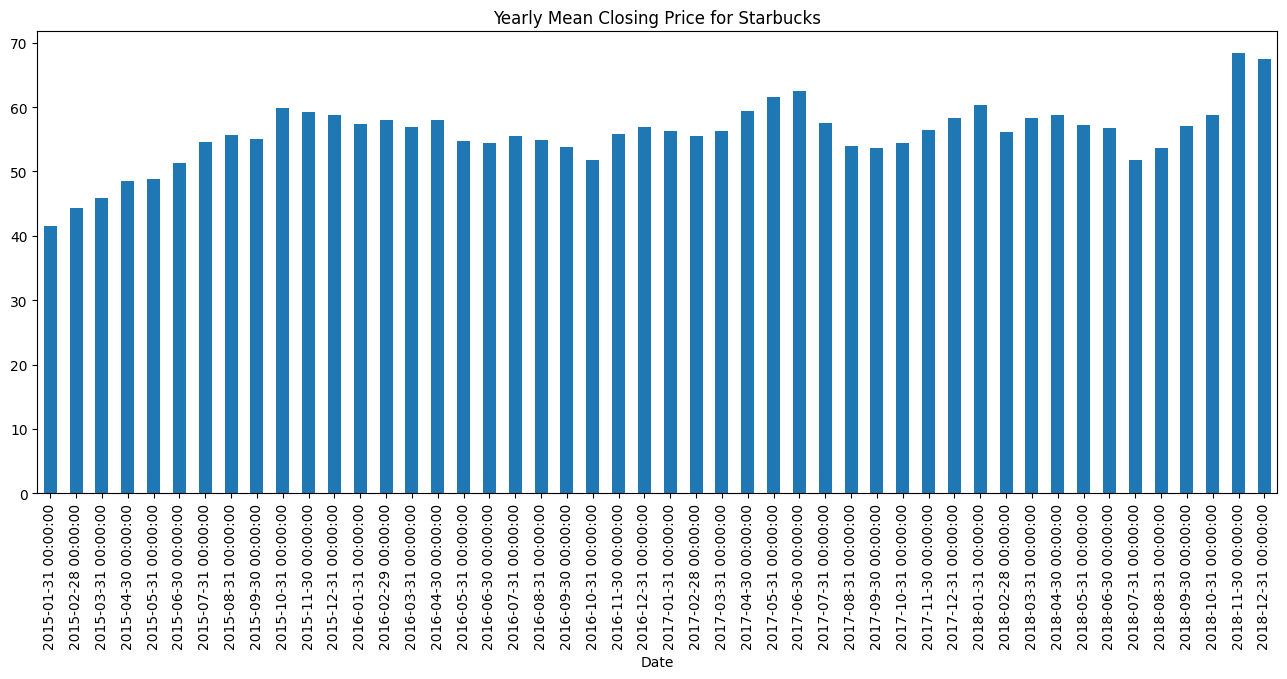

In [40]:
# Precio promedio por MES de la columna Close
df['Close'].resample('M').max() .plot.bar(figsize=(16,6),title='Yearly Mean Closing Price for Starbucks')

## Time Shifting

Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood. This isn't something we'll do often in the course, but it's definitely good to know about this anyways!

In [41]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [42]:
df.tail() #últimas 5 filas

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


### .shift() forward
This method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame.

In [43]:
# Va a desplazar hacia abajo todos los valores para todas las columnas, como el cierre y el volumen aquí.
df.shift(1)
# Básicamente, obtenemos un punto de datos vacío en la primera fila y perdemos la información en la última fila.

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [44]:
df.shift(5)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,64.47,15143054.0
2018-12-26,64.92,10523476.0
2018-12-27,64.06,14390146.0


In [45]:
# Si querés que quede así permanentemente
# df = df.shift(5)

### .shift() backwards

In [46]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [47]:
df.shift(-1)
# Tenemos una fila vacía al final porque cambiamos todo hacia arriba una fila.

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


### Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end. <br>Refer to the <em>Time Series Offset Aliases</em> table from the Time Resampling lecture for a full list of values, or click <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.<br>

In [48]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [49]:
df.shift(periods=1,freq='M').head()
# Básicamente estás empujando todo hacia el final de ese mes. Entonces, todo en enero termina siendo empujado al 31 de enero.

/tmp/ipykernel_2397/649547511.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.shift(periods=1,freq='M').head()


,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


For more info on time shifting visit http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html<br>
Up next we'll look at rolling and expanding!

## Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [50]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

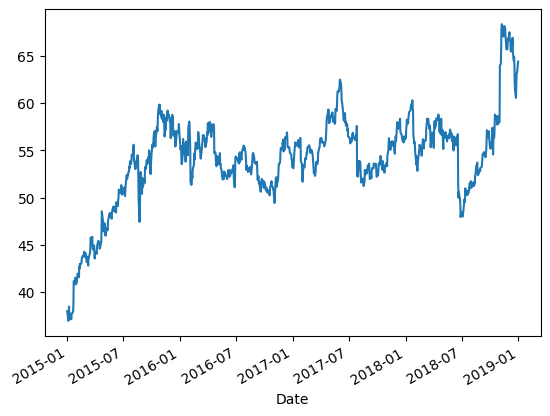

In [51]:
df['Close'].plot()

<Axes: xlabel='Date'>

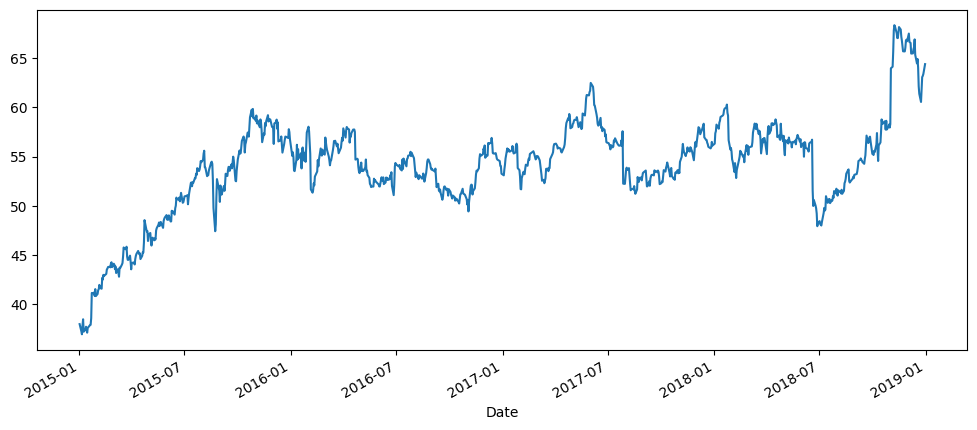

In [52]:
df['Close'].plot(figsize=(12,5))

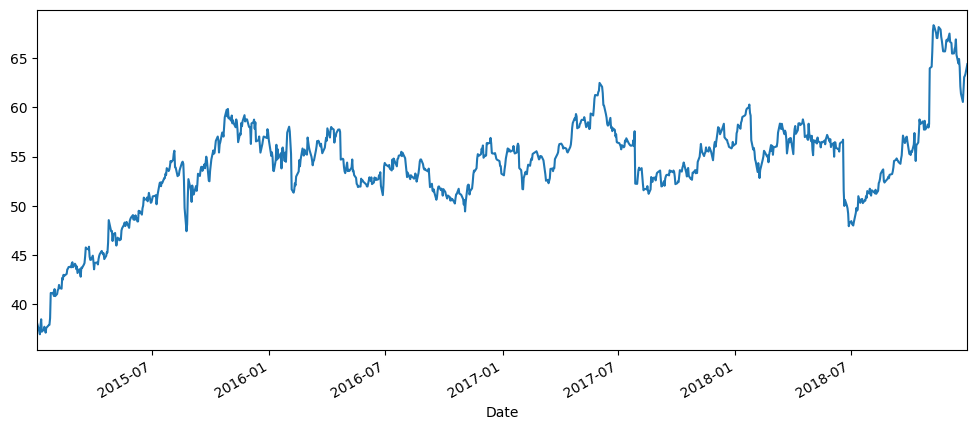

In [53]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [54]:
# Estoy mirando una ventana movil de 7 días y agrego los datos en ese periodo
df.rolling(window=7).mean()
# Vemos que los primeros 6 valores son NaN xq no llegan a tener 7 datos para tomar la media
# Los primeros valores de window-1 van a ser NaN

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


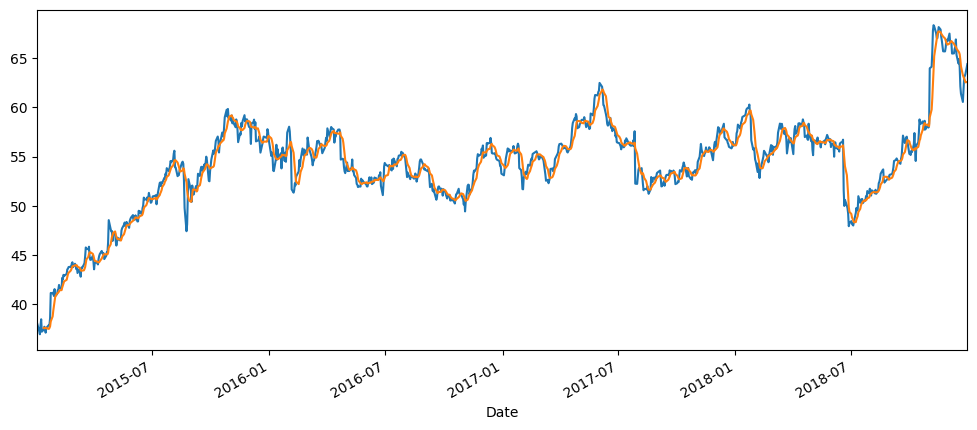

In [55]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=7).mean()['Close'].plot();
# A medida que se hace más pequeño, como una ventana móvil de 15 días, comienza a ajustarse cada vez más a los datos originales, 
# mostrando nuevamente un mayor nivel de tendencia.

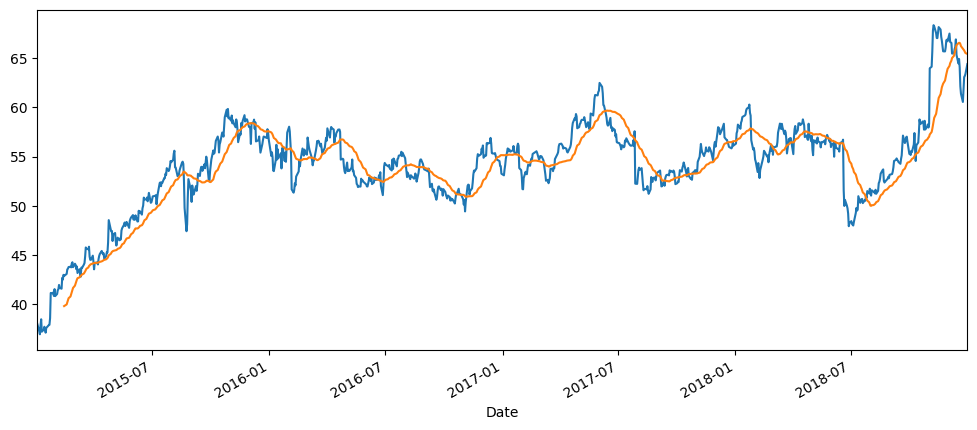

In [56]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();
# A medida que avanza más y más la ventana, de 30 días aquí, mostrará solo la tendencia general.

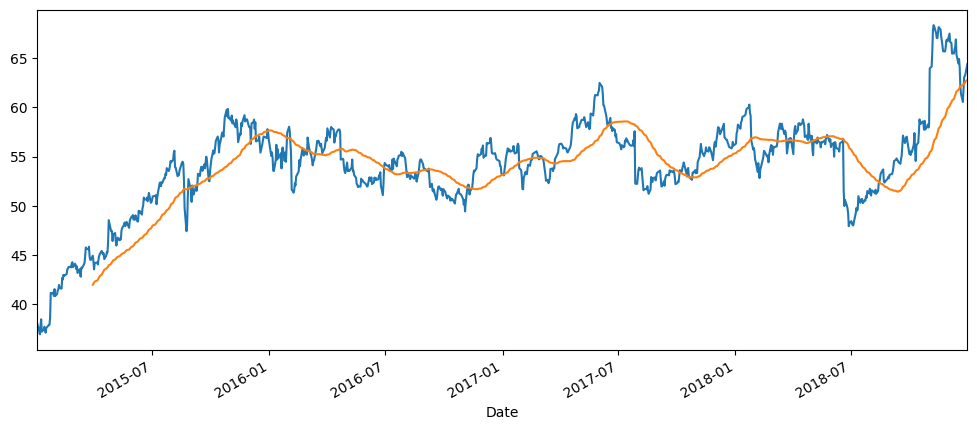

In [57]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=60).mean()['Close'].plot();

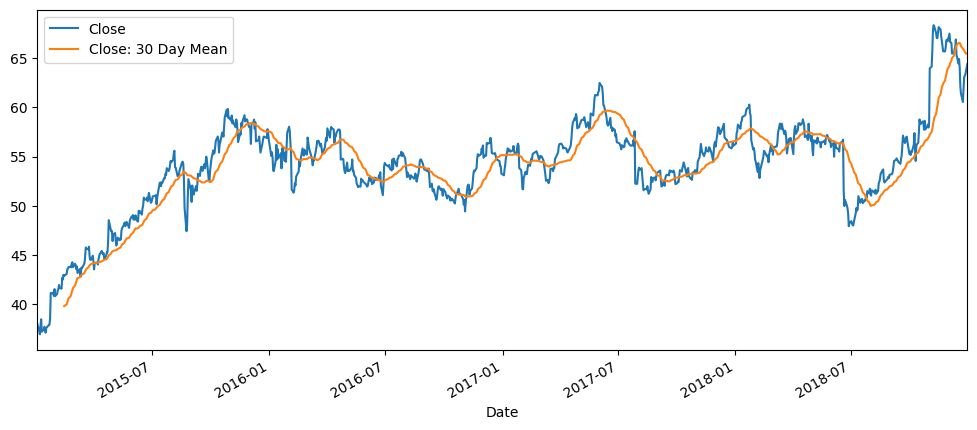

In [58]:
# La forma más fácil de agregar una leyenda a esto será convertir el valor variable en una nueva columna
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

También existe la capacidad de usar **expanding** (ventana creciente o acumulada).

En vez de calcular valores para ventanas móviles de fechas, ¿qué pasa si quieres tener en cuenta todo desde el principio de la serie temporal hasta cada punto en el tiempo? Por ejemplo, en vez de considerar el promedio de los últimos 7 días, consideraríamos todos los datos previos en nuestro conjunto expanding de promedios.

In [59]:
df['Close'].head()

Date
2015-01-02    38.0061
2015-01-05    37.2781
2015-01-06    36.9748
2015-01-07    37.8848
2015-01-08    38.4961
Name: Close, dtype: float64

In [60]:
(38.006100+37.2781)/2

37.6421

In [61]:
df['Close'].expanding().mean()
# Va tomando la media de todos los días que tiene antes

Date
2015-01-02    38.006100
2015-01-05    37.642100
2015-01-06    37.419667
2015-01-07    37.535950
2015-01-08    37.727980
                ...    
2018-12-24    54.032419
2018-12-26    54.041439
2018-12-27    54.050561
2018-12-28    54.059854
2018-12-31    54.070133
Name: Close, Length: 1006, dtype: float64

<Axes: xlabel='Date'>

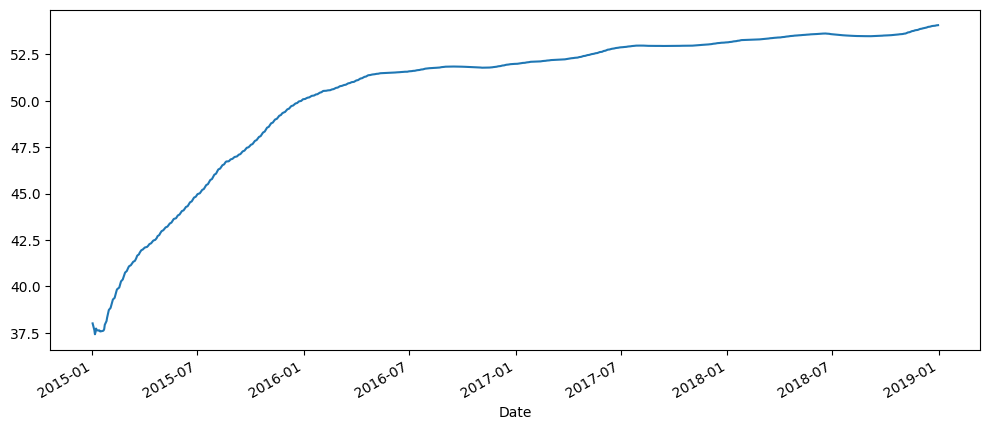

In [62]:
df['Close'].expanding().mean().plot(figsize=(12,5))

In [63]:
# Notará que la gráfica comienza a nivelarse porque tenemos más y más datos, entonces el promedio no va a cambiar tanto
# simplemente agregando una fila más y, de hecho, el último punto será el valor promedio para cada fila en los marcos de datos completos, 
# es el promedio de la columna completa.

## Visualizing Time Series Data

In [64]:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True) 
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [65]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

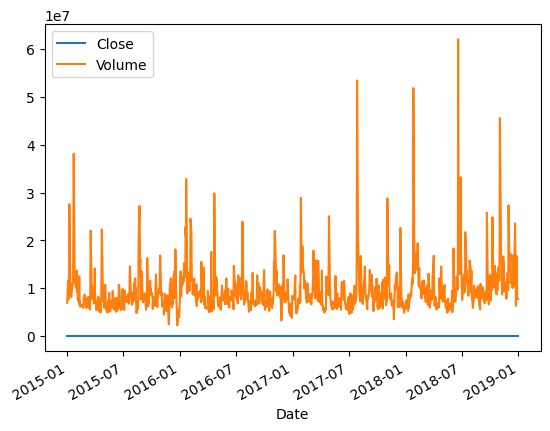

In [66]:
# Primero crearemos un gráfico lineal que coloque tanto Close como Volume en el mismo gráfico
df.plot();

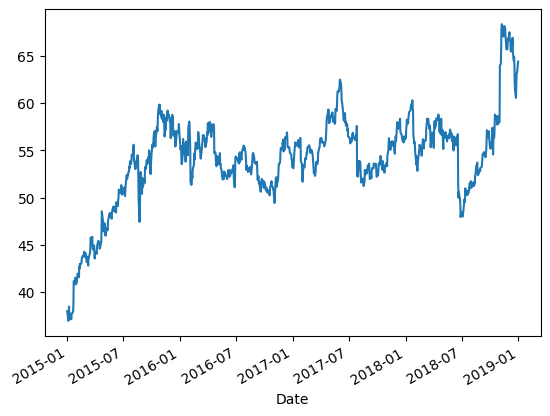

In [67]:
# Esto no es muy útil debido a la diferencia en los valores Y, por lo que los dividiremos.
df['Close'].plot();

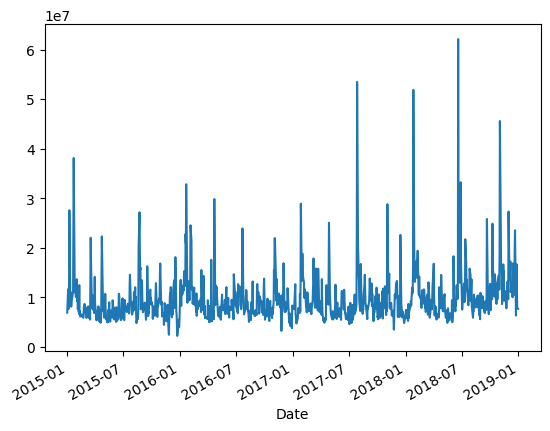

In [68]:
df['Volume'].plot();

### Plot Formatting

<div class="alert alert-info"><strong>NOTE:</strong> While we <em>can</em> pass a title into the pandas <tt>.plot()</tt> function, we can't pass x- and y-axis labels.<br>However, since <tt>.plot()</tt> returns a <tt>matplotlib.axes.AxesSubplot</tt> object, we can set the labels<br>on that object so long as we do it in the same jupyter cell. Setting an <tt>autoscale</tt> is done the same way.</div>

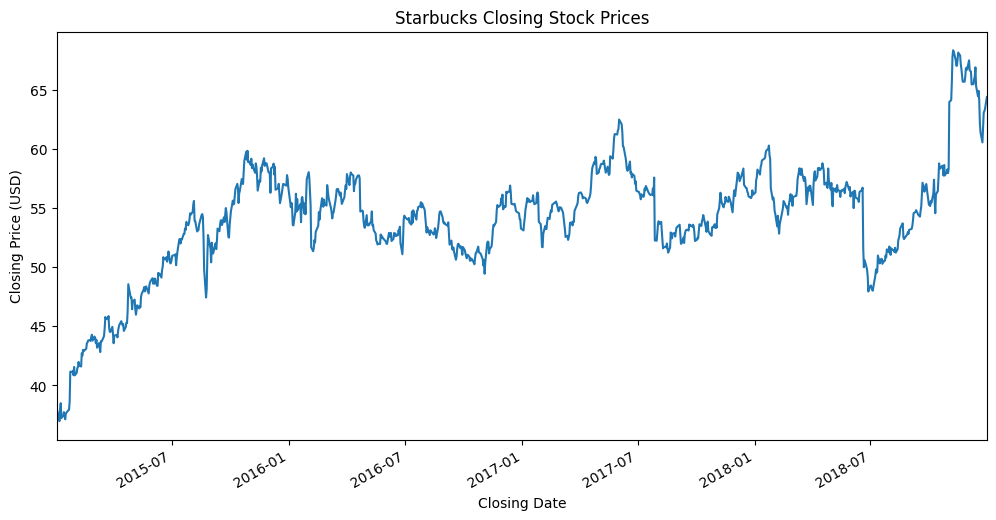

In [69]:
# Adding a title and axis labels

title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

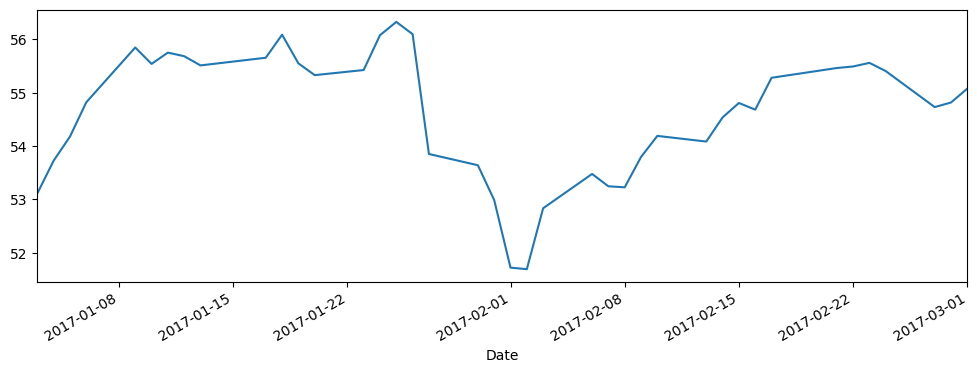

In [70]:
# Choosing X Limits by Slice

# Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x',tight=True);

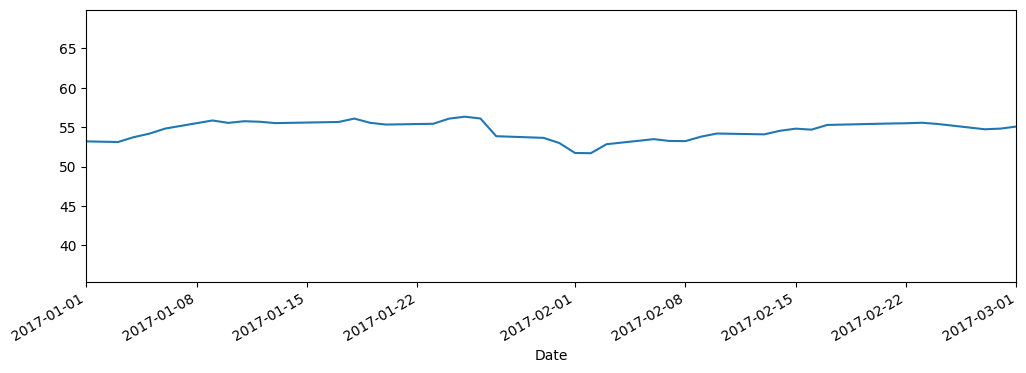

In [71]:
# Choosing X Limits by Argument

# Dates are separated by a comma:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

<div class="alert alert-info"><strong>NOTE:</strong> It's worth noting that the limit values do <em>not</em> have to appear in the index. Pandas will plot the actual dates based on their location in time.<br><br>Also, another advantage of slicing over arguments is that it's easier to include the upper/lower bound as a limit.<br>That is, <tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> is easier to type than <tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

Now let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

In [72]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

np.float64(51.6899)

In [73]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].max()

np.float64(56.3244)

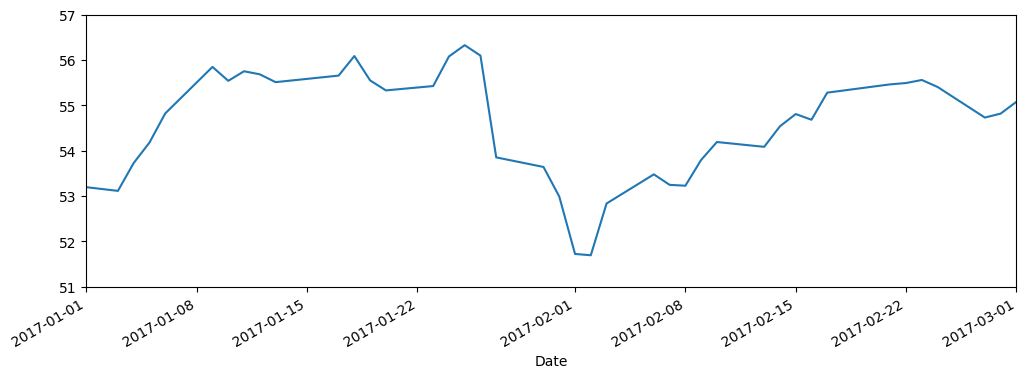

In [74]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57]);

<div class="alert alert-info"><strong>NOTE:</strong> Be careful when setting y-axis limits! Setting too narrow a slice can make graphs appear overly volatile. The above chart might lead you to believe that stocks were many times more valuable in January 2017 than in early February, but a look at them with the y-axis minimum set to zero tells a different story:</div>

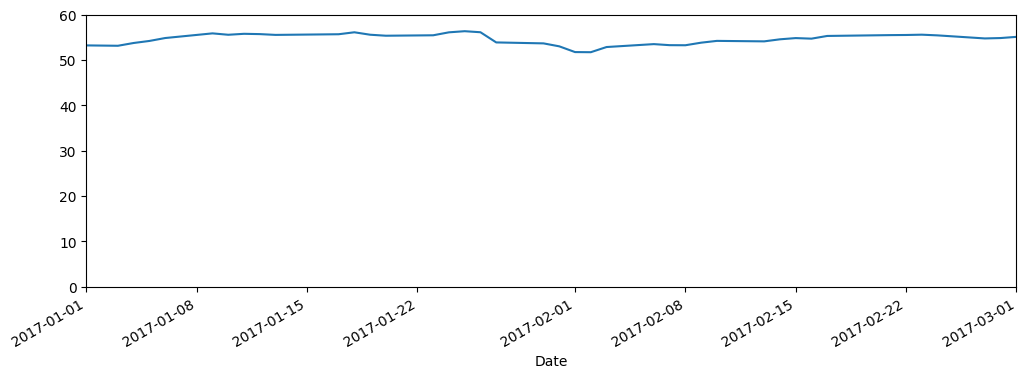

In [75]:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[0,60]);

### Title and axis labels

<div class="alert alert-info"><strong>REMEMBER:</strong> <tt><font color=black>ax.autoscale(axis='both',tight=True)</font></tt> is unnecessary if axis limits have been passed into <tt>.plot()</tt>.<br>
If we were to add it, autoscale would revert the axis limits to the full dataset.</div>

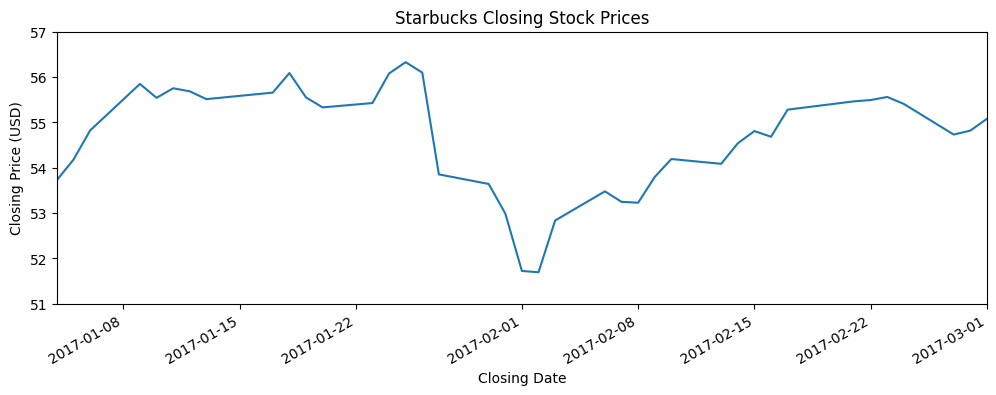

In [76]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Color and Style

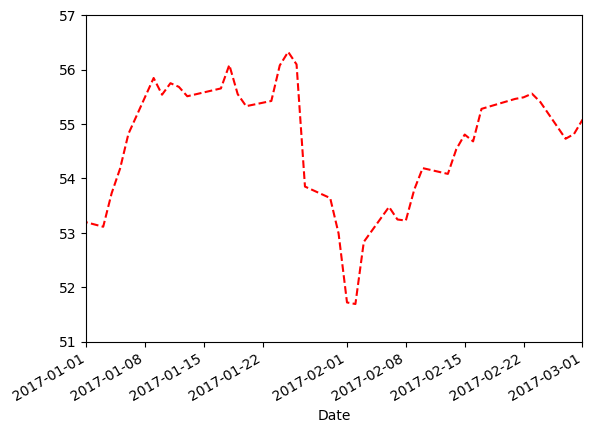

In [77]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

### X Ticks
In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.

In [78]:
from matplotlib import dates

#### Set the spacing
The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with <tt>.set_major_locator()</tt>.

<Axes: xlabel='Date'>

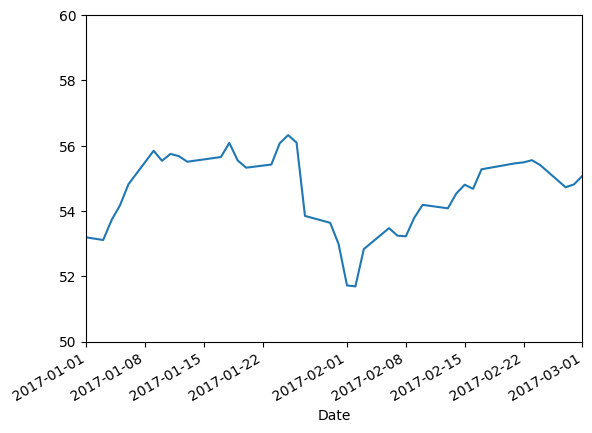

In [81]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60])

<Axes: xlabel='Date'>

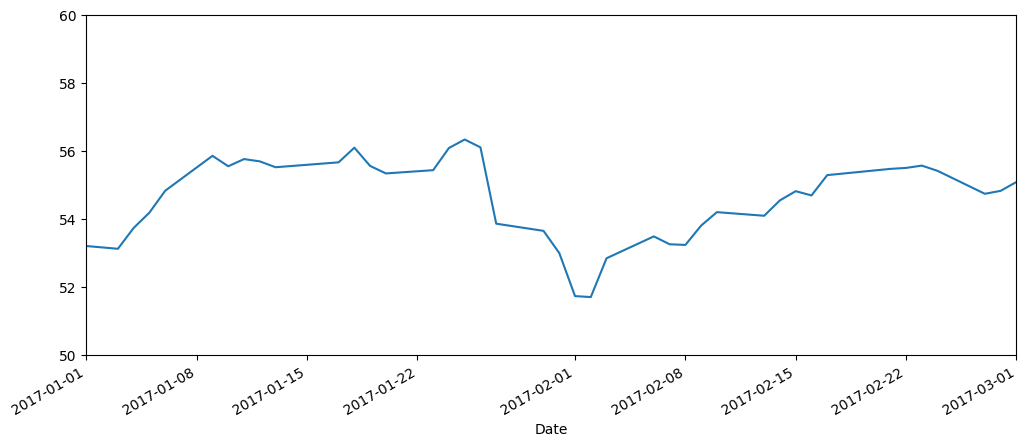

In [82]:
# Queremos que se vea mejor el eje X
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))

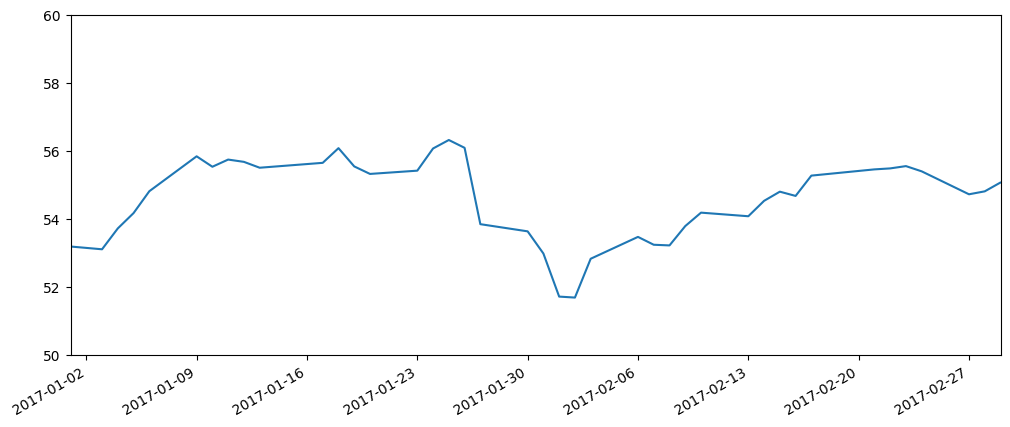

In [ ]:
# Queremos que se vea mejor el eje X
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')
# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

# Las fechas ahora están separadas por una semana.
# Eso es lo que el localizador de día de la semana hace por nosotros y las fechas se corresponden con el día 
# de la semana igual a cero, que si busca en el enlace de documentación cero es el lunes.

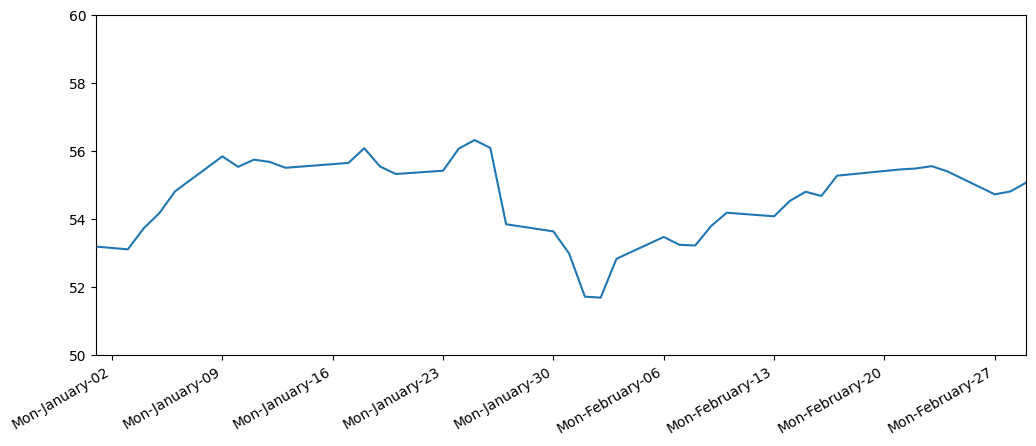

In [85]:
# Queremos que se vea mejor el eje X
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')
# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d')) #CAMBIAMOS COMO SE MUESTRA LA FECHA

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [ ]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

### Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

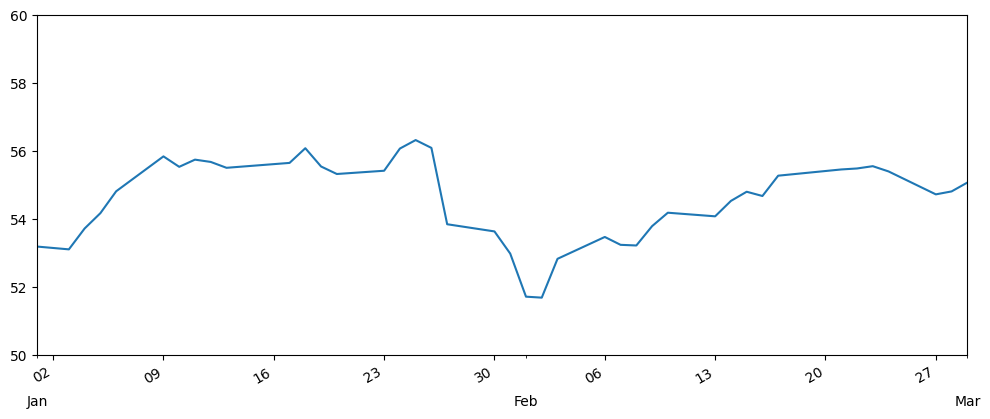

In [ ]:
# Queremos que se vea mejor el eje X
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')
# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d')) #CAMBIAMOS COMO SE MUESTRA LA FECHA

# AGREGAMOS ESTA PARTE
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

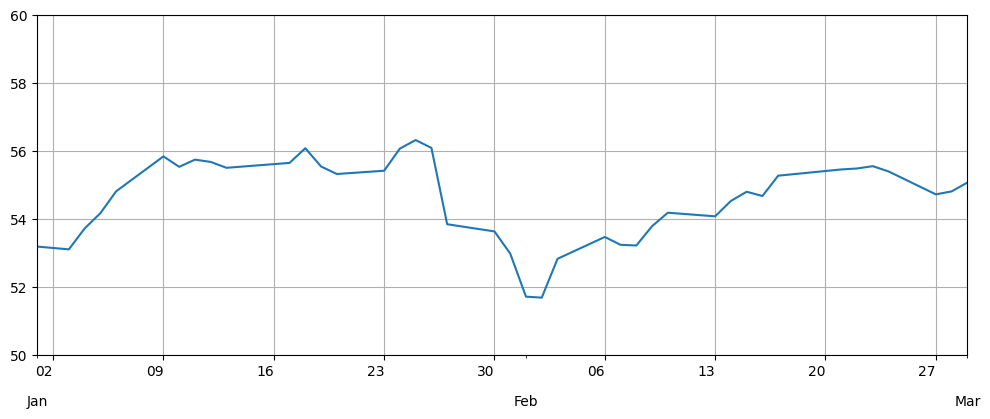

In [90]:
# Queremos que se vea mejor el eje X
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5),rot=0)
# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')
# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d')) #CAMBIAMOS COMO SE MUESTRA LA FECHA

# AGREGAMOS ESTA PARTE
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.xaxis.grid(True)
ax.yaxis.grid(True)

<font color=green><strong>NOTE: </strong>we passed a rotation argument <font color=black><strong>rot=0</strong></font> into <tt><font color=black>df.plot()</font></tt> so that the major axis values appear horizontal, not slanted.